# 0.0 Importando Biblioteca

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

# Funções

In [39]:
def get_data(path):
    data = pd.read_csv(path)
    
    return data

pd.set_option('display.float_format', lambda x : '%.2f' % x)

warnings.filterwarnings('ignore')

# changing the label size
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

# 1.0 Data

# Extraction

# 1.1 Load data

In [18]:
df = get_data('kc_house_data.csv')

# 1.2 Dataset Dimension

In [19]:
print('Number of columns: {}'.format(df.shape[1]))
print('Number of rows: {}'.format(df.shape[0]))

Number of columns: 21
Number of rows: 21613


# 1.3 Checking datatypes

In [20]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Transformation

In [21]:
# Convert column date from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# 1.4 Cleaning data

# 1.4.1 Check null values

In [22]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Clean Data

# 1.4.2 Checking Duplicates

In [23]:
df.duplicated().sum()

0

# 1.4.3 Drop duplicate columns

In [24]:
df = df.drop(columns = ['sqft_lot15', 'sqft_living15'])

# 1.5 Descriptive Stats

In [25]:
# select only data types equals to int64 and float64
num_attri = df.select_dtypes(include = ['int64', 'float64'])

# exclude the id column
num_attri = num_attri.iloc[:, 1:]

mean = pd.DataFrame(num_attri.apply(np.mean))
median = pd.DataFrame(num_attri.apply(np.median))
std = pd.DataFrame(num_attri.apply(np.std))
max_ = pd.DataFrame(num_attri.apply(np.max))
min_ = pd.DataFrame(num_attri.apply(np.min))

# concatenate all created variables
df0 = pd.concat([max_, min_, mean, median, std ], axis = 1).reset_index()

# rename columns
df0.columns = ['attributes', 'max', 'min', 'mean', 'median', 'std']

In [26]:
df0

,attributes,max,min,mean,median,std
0,price,7700000.00,75000.00,540088.14,450000.00,367118.70
1,bedrooms,33.00,0.00,3.37,3.00,0.93
2,bathrooms,8.00,0.00,2.11,2.25,0.77
3,sqft_living,13540.00,290.00,2079.90,1910.00,918.42
4,sqft_lot,1651359.00,520.00,15106.97,7618.00,41419.55
5,floors,3.50,1.00,1.49,1.50,0.54
6,waterfront,1.00,0.00,0.01,0.00,0.09
7,view,4.00,0.00,0.23,0.00,0.77
8,condition,5.00,1.00,3.41,3.00,0.65
9,grade,13.00,1.00,7.66,7.00,1.18


# 1.6 New Features

In [27]:
# feature for hypothesis 1
df['waterview'] = df['waterfront'].apply(lambda x : 'no' if (x == 0) else 'yes')

# feature for hypothesis 2
df['yr_b_mean'] = df['yr_built'].apply(lambda x : '< 1955' if (x < 1955) else '> 1955' )

# feature for hypothesis 3
df['has_basement'] = df['sqft_basement'].apply(lambda x : 'no' if (x == 0) else 'yes')

# feature for hypothesis 4
df['year'] = pd.to_datetime(df['date']).dt.year

# feature for hypothesis 5
df['month'] = pd.to_datetime(df['date']).dt.month

# 2.0 Answering hypothesis

# Hypothesis 1: Usually real state with waterfront view are more 30% expensive in average

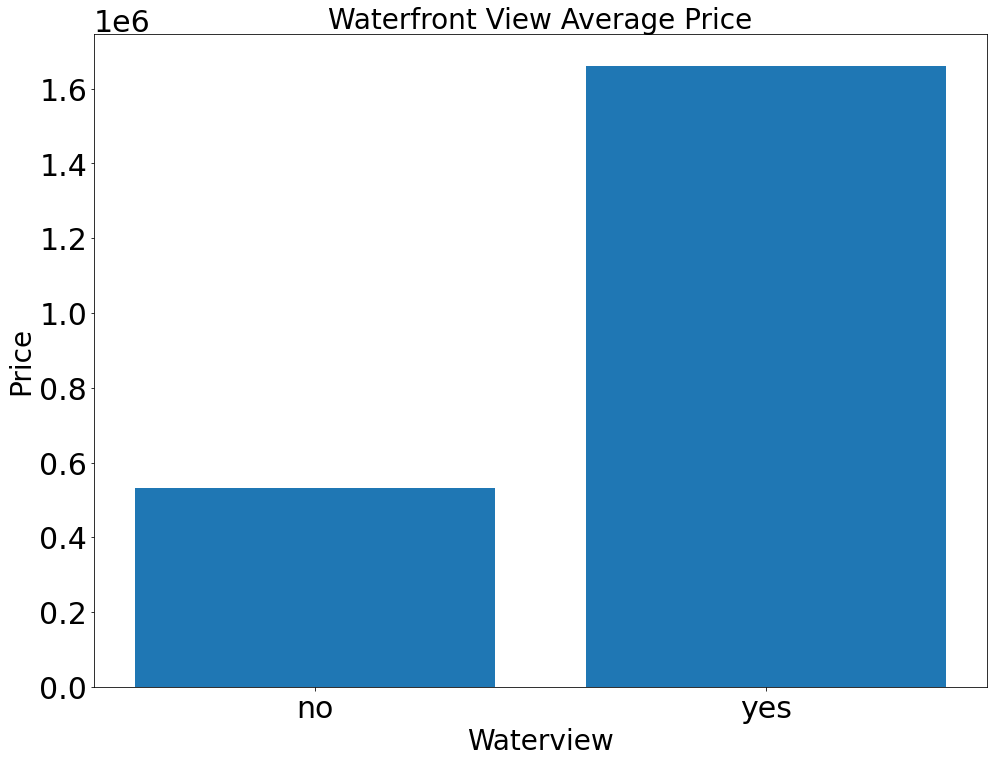

In [40]:
h1 = df[['waterview', 'price']].groupby('waterview').mean().reset_index()

plt.figure(figsize = (16, 12))
plt.bar(h1['waterview'], h1['price'])
plt.xlabel('Waterview', fontsize = 28)
plt.ylabel('Price', fontsize = 28)
plt.title('Waterfront View Average Price', fontsize = 28)
plt.show()

# Hypothesis 2: Real state with year of construction less than 1955 are 50% cheaper in average

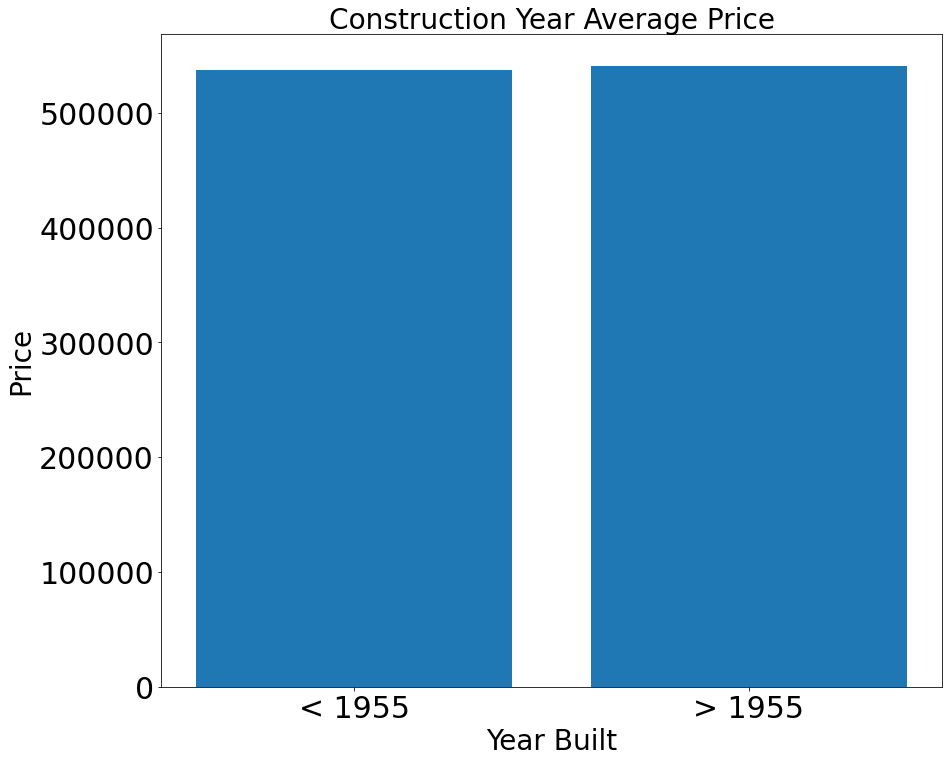

In [41]:
h2 = df[['yr_b_mean', 'price']].groupby('yr_b_mean').mean().reset_index()

plt.figure(figsize = (14, 12))
plt.bar(h2['yr_b_mean'], h2['price'])
plt.xlabel('Year Built', fontsize = 28)
plt.ylabel('Price', fontsize = 28)
plt.title('Construction Year Average Price', fontsize = 28)
plt.show()

# Hypothesis 3: Real state without basement, have a greater sqft lot about 40% in average

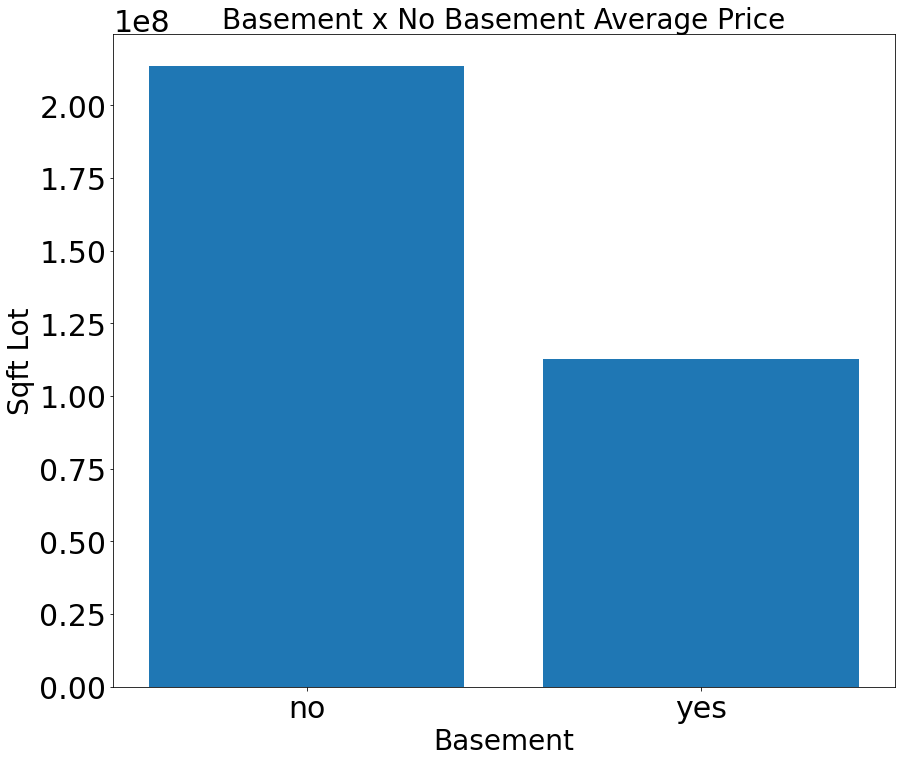

In [42]:
h3 = df[['has_basement', 'sqft_lot']].groupby('has_basement').sum().reset_index()

plt.figure(figsize = (14, 12))
plt.bar(h3['has_basement'], h3['sqft_lot'])
plt.xlabel('Basement', fontsize = 28)
plt.ylabel('Sqft Lot', fontsize = 28)
plt.title('Basement x No Basement Average Price', fontsize = 28)
plt.show()

# Hypothesis 4: The price growth YoY of real state is 10%

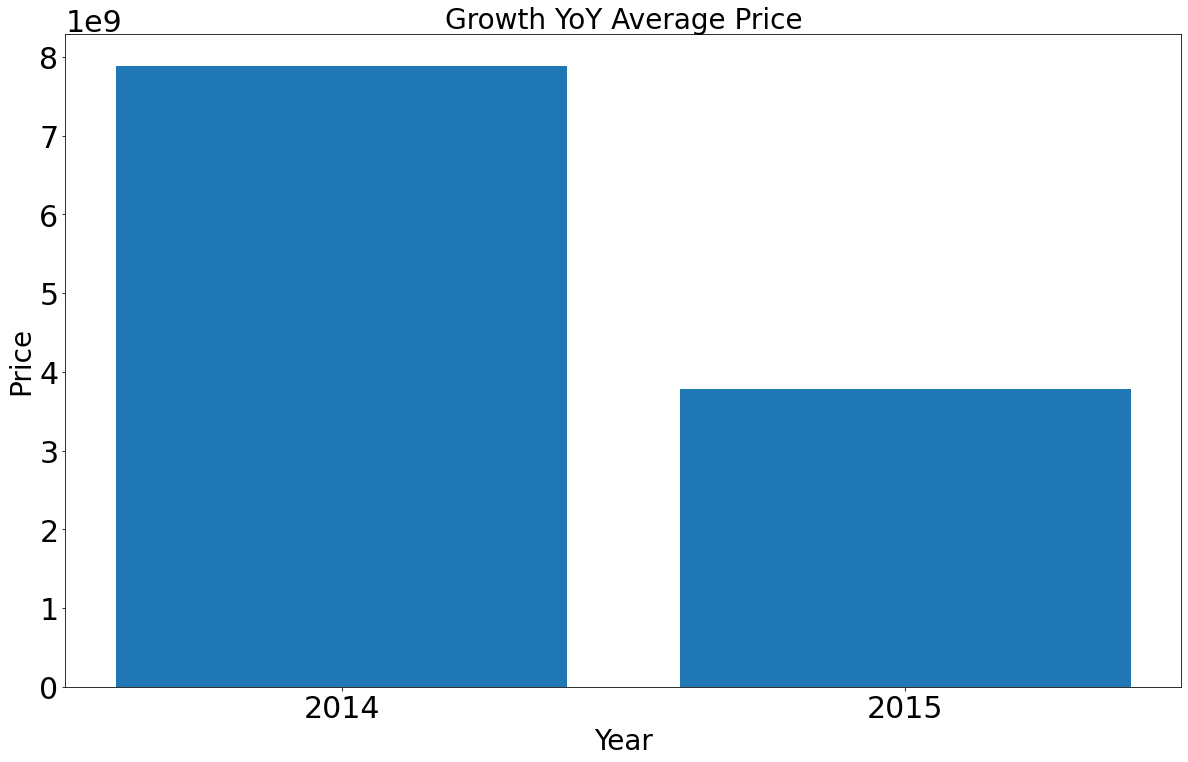

In [43]:
h4 = df[['year', 'price']].groupby('year').sum().reset_index()

plt.figure(figsize = (20, 12))
plt.bar(h4['year'], h4['price'])
plt.xticks(h4['year'], ['2014', '2015'])
plt.xlabel('Year', fontsize = 28)
plt.ylabel('Price', fontsize = 28)
plt.title('Growth YoY Average Price', fontsize = 28)
plt.show()

# Hypothesis 5: Real state with 3 bathrooms have a price growth MoM of 15% 

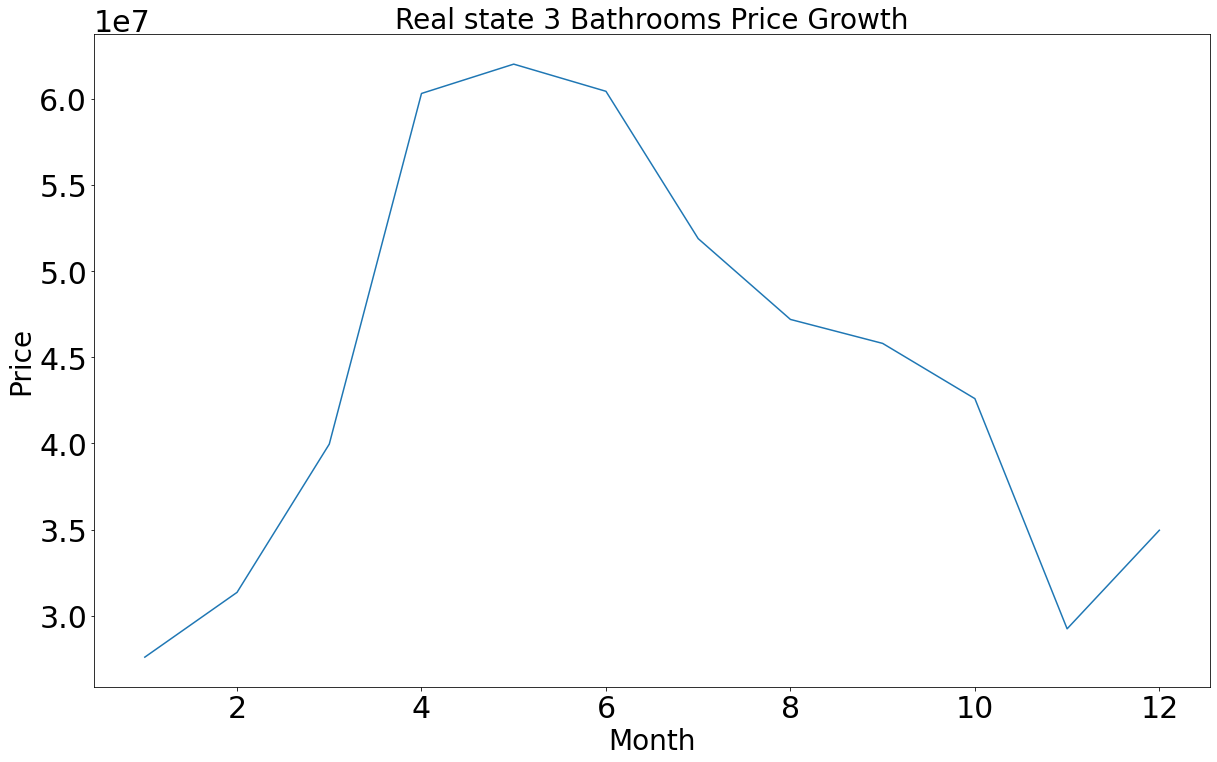

In [44]:
h5 = df[['bathrooms','month', 'price']].groupby(['bathrooms', 'month']).sum().reset_index()
h5 = h5[h5['bathrooms']==3]

plt.figure(figsize = (20, 12))
plt.plot(h5['month'], h5['price'])
plt.xlabel('Month', fontsize = 28)
plt.ylabel('Price', fontsize = 28)
plt.title('Real state 3 Bathrooms Price Growth', fontsize = 28)
plt.show()

# Hypothesis

# Hypothesis

# Hypothesis

# Hypothesis

# Hypothesis

In [45]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'waterview', 'yr_b_mean', 'has_basement', 'year',
       'month'],
      dtype='object')

# 3.0 Business Questions

# 3.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

In [46]:
# create feature for price median and concatenate with dataset
data = pd.DataFrame()

data = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df2 = pd.merge(df, data, on = 'zipcode', how = 'inner')

df2 = df2.rename(columns = {'price_x' : 'price', 'price_y' : 'price_median' })

# set conditions to buy or not
for i in range(len(df2)):
    if (df2.loc[i, 'price'] < df2.loc[i, 'price_median']) & ( df2.loc[i, 'condition'] >= 3): 
        df2.loc[i, 'status'] = 'buy'
    else: 
        df2.loc[i, 'status'] = 'do not buy'

In [47]:
df2[['id', 'date', 'condition',  'zipcode', 'price', 'price_median', 'status']]

,id,date,condition,zipcode,price,price_median,status
0,7129300520,2014-10-13,3,98178,221900.00,278277.00,buy
1,4060000240,2014-06-23,4,98178,205425.00,278277.00,buy
2,4058801670,2014-07-17,3,98178,445000.00,278277.00,do not buy
3,2976800796,2014-09-25,3,98178,236000.00,278277.00,buy
4,6874200960,2015-02-27,3,98178,170000.00,278277.00,buy
...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,4,98039,2720000.00,1892500.00,do not buy
21609,2525049113,2014-07-25,4,98039,1950000.00,1892500.00,do not buy
21610,3262300485,2015-04-21,3,98039,2250000.00,1892500.00,do not buy
21611,6447300365,2014-11-13,3,98039,2900000.00,1892500.00,do not buy


In [48]:
df2[df2['status'] == 'buy'].sort_values(by = 'price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,waterview,yr_b_mean,has_basement,year,month,price_median,status
21571,6447300225,2014-11-06,1880000.00,3,2.75,2620,17919,1.00,0,1,...,98039,47.61,-122.23,no,< 1955,no,2014,11,1892500.00,buy
21601,2470200020,2014-05-14,1880000.00,4,2.75,3260,19542,1.00,0,0,...,98039,47.62,-122.24,no,> 1955,yes,2014,5,1892500.00,buy
21612,3262300818,2015-02-27,1865000.00,4,3.75,3790,8797,2.00,0,0,...,98039,47.64,-122.24,no,> 1955,yes,2015,2,1892500.00,buy
21584,5425700205,2014-05-20,1800000.00,4,3.50,4460,16953,1.00,0,0,...,98039,47.63,-122.23,no,> 1955,yes,2014,5,1892500.00,buy
21586,2525049266,2014-08-21,1762000.00,3,2.25,3060,16000,2.00,0,0,...,98039,47.62,-122.23,no,> 1955,no,2014,8,1892500.00,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228,2422049104,2014-09-15,85000.00,2,1.00,830,9000,1.00,0,0,...,98032,47.38,-122.24,no,< 1955,no,2014,9,249000.00,buy
17054,1523049188,2015-04-30,84000.00,2,1.00,700,20130,1.00,0,0,...,98168,47.48,-122.27,no,< 1955,no,2015,4,235000.00,buy
17253,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,0,0,...,98168,47.47,-122.27,no,< 1955,no,2014,5,235000.00,buy
2725,3883800011,2014-11-05,82000.00,3,1.00,860,10426,1.00,0,0,...,98146,47.50,-122.34,no,< 1955,no,2014,11,305000.00,buy


# 3.2 Uma vez comprado, qual o melhor momento para vendê-lo e por qual preço?

In [49]:
# categorize by season available
df2['season'] = df2['month'].apply( lambda x :'Spring' if ( x >= 3) & (x <= 5) else 'Summer' if(x >= 6) & (x <= 8)
                                             else 'Autumn' if (x >= 9) & (x <= 11) else 'Winter' ) 

df3 = df2.copy()
b4 = df3[df3['status'] == 'buy']

b2 = b4[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

b5 = pd.merge(b4, b2, on = ['season', 'zipcode'], how = 'inner')

b5 = b5.rename(columns = {'price_x' : 'price', 'price_y' : 'price_median_season'})


for i in range(len(b5)):
    if (b5.loc[i, 'price_median_season'] < b5.loc[i, 'price']):
        
        b5.loc[i, 'Sell Price'] = (b5.loc[i, 'price'] * 1.3)
        
        b5.loc[i, 'Profit'] = (b5.loc[i, 'price'] * 0.3)
        
    else:
        
        b5.loc[i, 'Sell Price'] = (b5.loc[i, 'price'] * 1.1)
        
        b5.loc[i, 'Profit'] = (b5.loc[i, 'price'] * 0.1)

In [50]:
b5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_b_mean,has_basement,year,month,price_median,status,season,price_median_season,Sell Price,Profit
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,> 1955,no,2014,10,278277.00,buy,Autumn,213250.00,288470.00,66570.00
1,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,> 1955,no,2014,9,278277.00,buy,Autumn,213250.00,306800.00,70800.00
2,1180003090,2014-09-06,190000.00,2,1.00,630,6000,1.00,0,0,...,< 1955,no,2014,9,278277.00,buy,Autumn,213250.00,209000.00,19000.00
3,179000350,2014-11-05,194000.00,3,1.50,1010,5000,1.00,0,0,...,< 1955,no,2014,11,278277.00,buy,Autumn,213250.00,213400.00,19400.00
4,3810000202,2014-09-05,251700.00,3,2.25,1810,11800,1.00,0,0,...,> 1955,yes,2014,9,278277.00,buy,Autumn,213250.00,327210.00,75510.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,5425700150,2014-08-04,787500.00,4,1.75,1580,9382,1.00,0,0,...,> 1955,yes,2014,8,1892500.00,buy,Summer,1335000.00,866250.00,78750.00
10575,2525049266,2014-08-21,1762000.00,3,2.25,3060,16000,2.00,0,0,...,> 1955,no,2014,8,1892500.00,buy,Summer,1335000.00,2290600.00,528600.00
10576,5427110040,2014-06-09,1225000.00,4,2.50,2740,16007,2.00,0,0,...,> 1955,no,2014,6,1892500.00,buy,Summer,1335000.00,1347500.00,122500.00
10577,3625049079,2014-08-01,1350000.00,3,2.00,2070,9600,1.00,0,1,...,< 1955,yes,2014,8,1892500.00,buy,Summer,1335000.00,1755000.00,405000.00


In [51]:
b5[['id', 'date','season', 'zipcode', 'price', 'price_median', 'price_median_season', 'Sell Price', 'Profit']]

,id,date,season,zipcode,price,price_median,price_median_season,Sell Price,Profit
0,7129300520,2014-10-13,Autumn,98178,221900.00,278277.00,213250.00,288470.00,66570.00
1,2976800796,2014-09-25,Autumn,98178,236000.00,278277.00,213250.00,306800.00,70800.00
2,1180003090,2014-09-06,Autumn,98178,190000.00,278277.00,213250.00,209000.00,19000.00
3,179000350,2014-11-05,Autumn,98178,194000.00,278277.00,213250.00,213400.00,19400.00
4,3810000202,2014-09-05,Autumn,98178,251700.00,278277.00,213250.00,327210.00,75510.00
...,...,...,...,...,...,...,...,...,...
10574,5425700150,2014-08-04,Summer,98039,787500.00,1892500.00,1335000.00,866250.00,78750.00
10575,2525049266,2014-08-21,Summer,98039,1762000.00,1892500.00,1335000.00,2290600.00,528600.00
10576,5427110040,2014-06-09,Summer,98039,1225000.00,1892500.00,1335000.00,1347500.00,122500.00
10577,3625049079,2014-08-01,Summer,98039,1350000.00,1892500.00,1335000.00,1755000.00,405000.00


Text(0.5, 1.0, 'Average Price by Season')

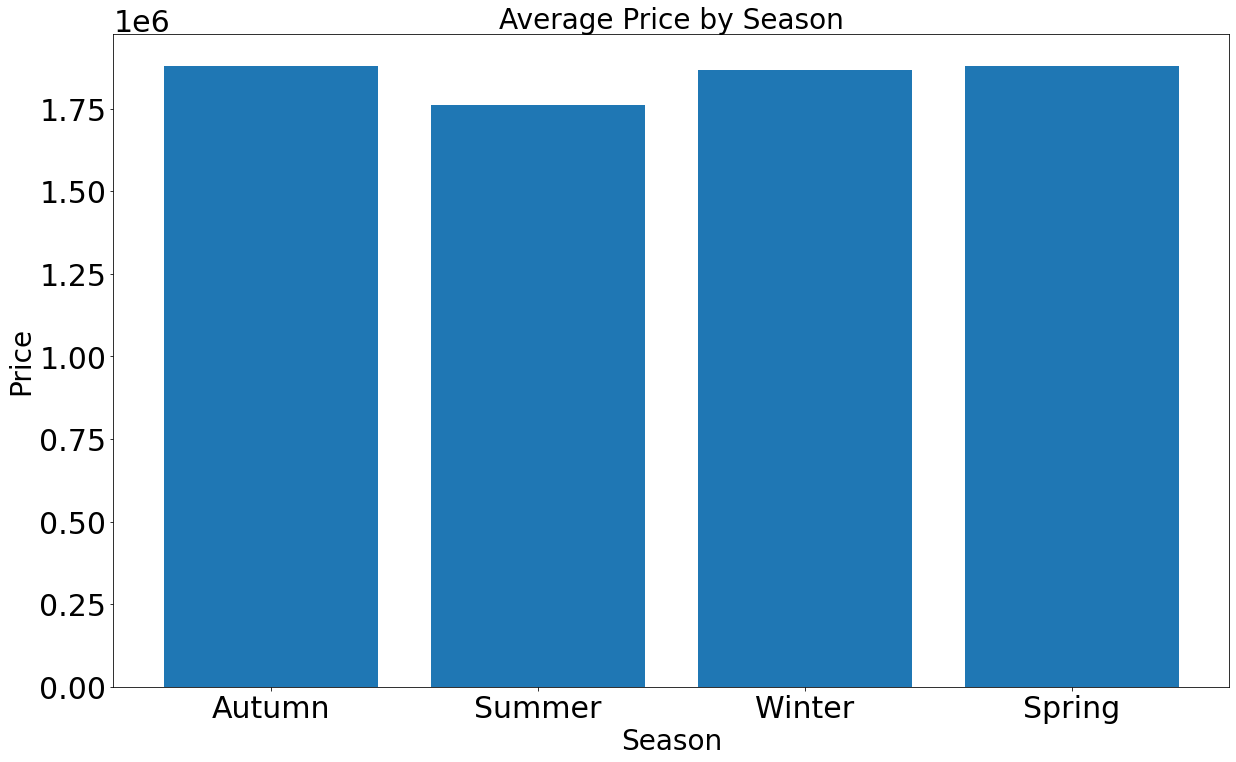

In [53]:
season = b5[['season', 'price']].groupby('season').sum().reset_index()

# plot
plt.figure(figsize = (20, 12))
plt.bar(b5['season'], b5['price'])
plt.xlabel('Season', fontsize = 28)
plt.ylabel('Price', fontsize = 28)
plt.title('Average Price by Season', fontsize = 28)